https://www.kaggle.com/code/mikhailzemskov/understanding-stft-and-spectrograms

In [8]:
!uv pip install librosa

Audited 1 package in 11ms


In [1]:
import numpy as np

from scipy.signal.windows import hann
from scipy.signal import ShortTimeFFT

import os

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import librosa
import librosa.display

In [2]:
path = 'test_data/Ojebokoren_ThatsEntertainment_Full/'

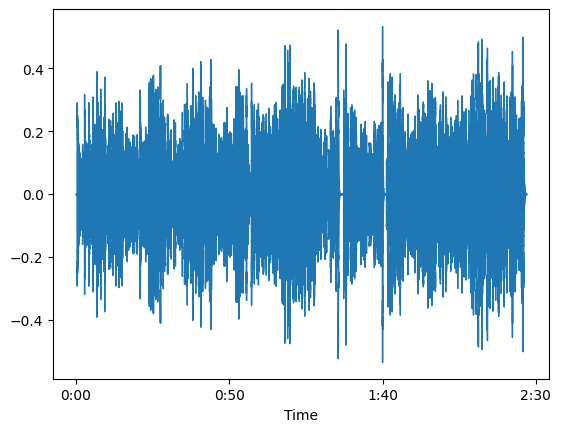

In [3]:
y, sr = librosa.load(path+"01_PianoDI.wav", sr=None)  # Use original sample rate
librosa.display.waveshow(y, sr=sr)


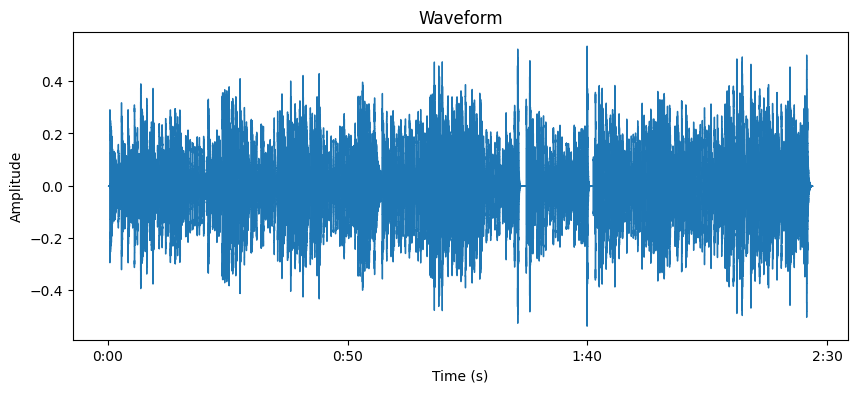

In [5]:
y, sr = librosa.load(path+"01_PianoDI.wav", sr=None)  # Use original sample rate

# Display waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

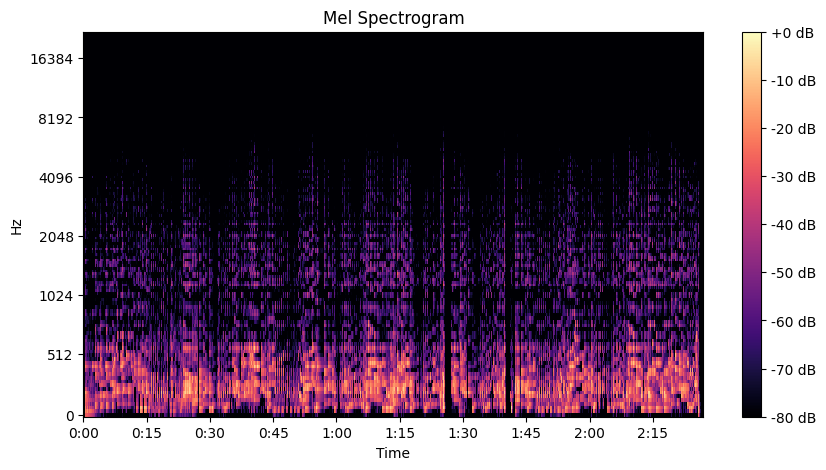

In [12]:
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()

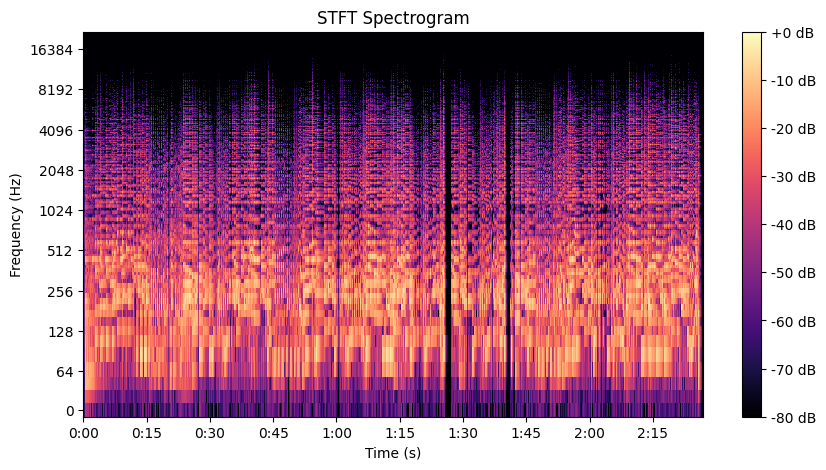

In [13]:
# Compute the Short-Time Fourier Transform (STFT)
D = np.abs(librosa.stft(y))

# Convert to dB scale
D_db = librosa.amplitude_to_db(D, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(D_db, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("STFT Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

In [6]:
y_30s = y[:30 * sr]  # Extracts the first 30 seconds

In [7]:
# Compute the Short-Time Fourier Transform (STFT)
D = np.abs(librosa.stft(y[:10 * sr]))

In [9]:
D.shape

(1025, 862)

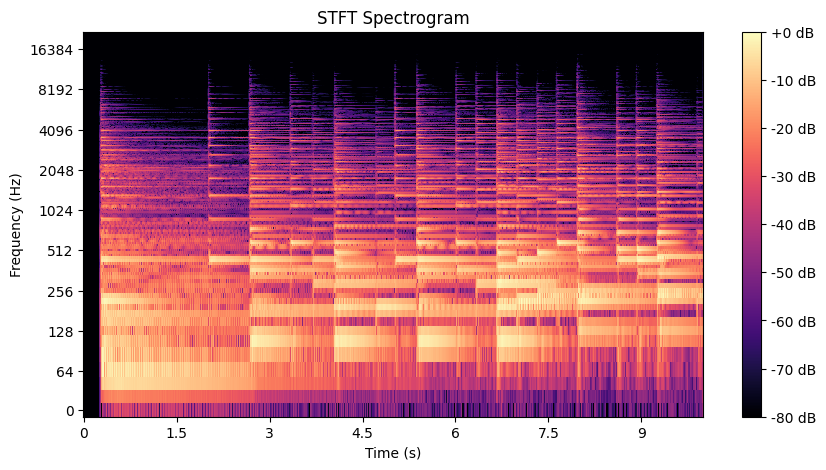

In [ ]:
# Convert to dB scale
D_db = librosa.amplitude_to_db(D, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(D_db, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("STFT Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()